In [1]:
import numpy as np
from shapely.geometry.polygon import LinearRing
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

### Finding points in an arbitrarily rotated ellipse

In [2]:
# The ellipse parametes
ellipse_center = (0.5, 0.4)
ellipse_width = 0.5
ellipse_height = 0.2
rotation_angle = 50

# some test points for matching
x = np.random.rand(1000)
y = np.random.rand(1000)

Text(0, 0.5, 'y')

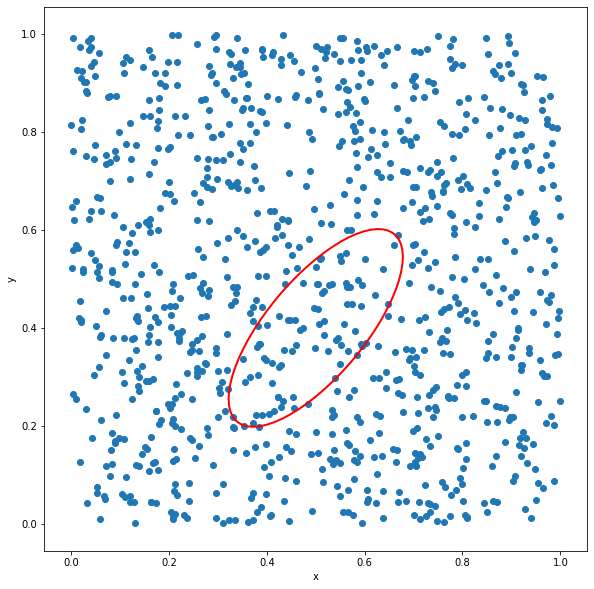

In [3]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ellipse1 = patches.Ellipse(ellipse_center, ellipse_width, ellipse_height, angle=rotation_angle, fill=False, 
                           edgecolor='red', linewidth=2)
ax.add_patch(ellipse1)
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [4]:
cos_angle = np.cos(np.deg2rad(rotation_angle))
sin_angle = np.sin(np.deg2rad(rotation_angle))

# transforming the coordinates along the major and minor axis of the rotated ellipse
xc = x - ellipse_center[0]
yc = y - ellipse_center[1]

xct = xc*cos_angle + yc*sin_angle
yct = -xc*sin_angle + yc*cos_angle 

# normalized ellipse equation
norm_equation = ((xct**2)/(ellipse_width/2)**2) + ((yct**2)/(ellipse_height/2)**2)

In [5]:
colors_points = []

for r in norm_equation:
    if r <= 1:
        # point in ellipse
        colors_points.append('red')
    else:
        # point not in ellipse
        colors_points.append('black')

Text(0, 0.5, 'y')

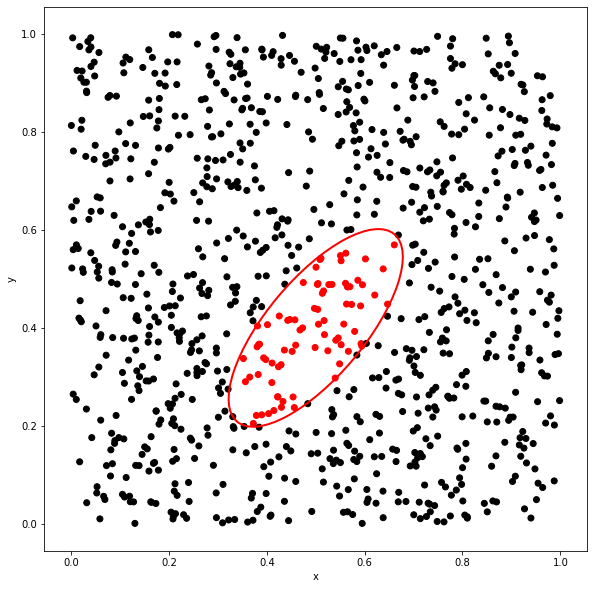

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')
ellipse1 = patches.Ellipse(ellipse_center, ellipse_width, ellipse_height, angle=rotation_angle, fill=False, 
                           edgecolor='red', linewidth=2)
ax.add_patch(ellipse1)
ax.scatter(x, y, c=colors_points)
ax.set_xlabel('x')
ax.set_ylabel('y')

### Finding the intersections of two arbitrarily rotated ellipses

In [7]:
def ellipse_polyline(ellipses, n=1000):
    '''
    INPUT:
    ellipse parameters in the form:
    (center_x, center_y, semimajor_axis, semiminor_axis, rotation_angle(in degrees))
    '''
    t = np.linspace(0, 2*np.pi, n, endpoint=False)
    sin_t = np.sin(t)
    cos_t = np.cos(t)
    result = []
    for x0, y0, a, b, angle in ellipses:
        angle = np.deg2rad(angle)
        sin_a = np.sin(angle)
        cos_a = np.cos(angle)
        p = np.empty((n, 2))
        p[:, 0] = x0 + a*cos_a*cos_t - b*sin_a*sin_t
        p[:, 1] = y0 + a*sin_a*cos_t + b*cos_a*sin_t
        result.append(p)
    return result

def num_intersections(a, b):
    ea = LinearRing(a)
    eb = LinearRing(b)
    mp = ea.intersection(eb)
    return len(mp)


def intersections(a, b):
    ea = LinearRing(a)
    eb = LinearRing(b)
    mp = ea.intersection(eb)
    #print(mp)
    x = [p.x for p in mp]
    y = [p.y for p in mp]
    return x, y

number of intersections:  2


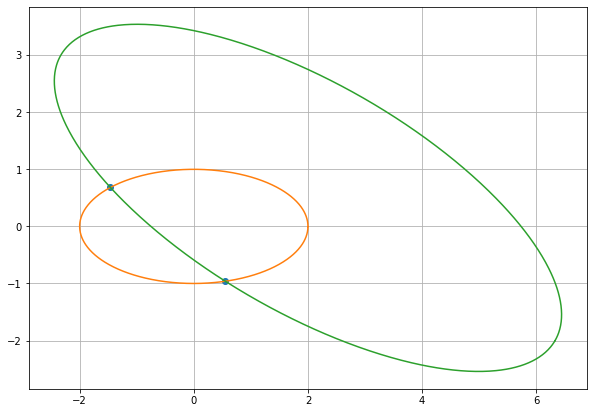

In [8]:
ellipses = [(0, 0, 2, 1, 0), (2, 0.5, 5, 2, -30)]
a, b = ellipse_polyline(ellipses)
print('number of intersections: ', num_intersections(a, b))

x, y = intersections(a, b)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, "o")
ax.plot(a[:,0], a[:,1])
ax.plot(b[:,0], b[:,1])
ax.set_aspect('equal')
ax.grid(':')

number of intersections:  4


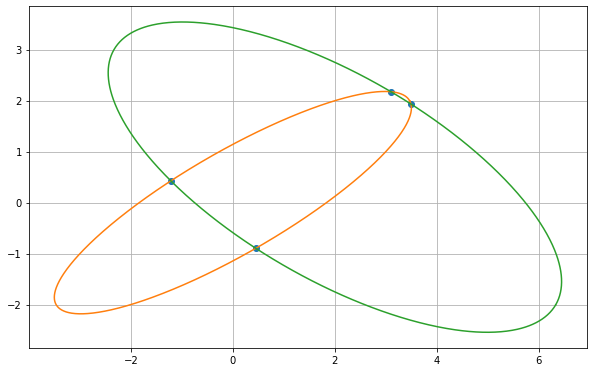

In [9]:
ellipses = [(0, 0, 4, 1, 30), (2, 0.5, 5, 2, -30)]
a, b = ellipse_polyline(ellipses)
print('number of intersections: ', num_intersections(a, b))

x, y = intersections(a, b)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, "o")
ax.plot(a[:,0], a[:,1])
ax.plot(b[:,0], b[:,1])
ax.set_aspect('equal')
ax.grid(':')

number of intersections:  0


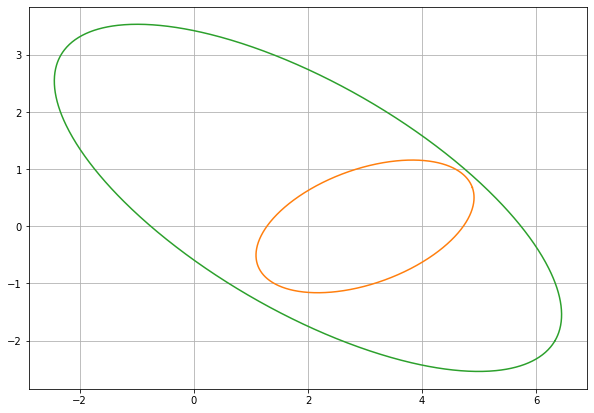

In [10]:
ellipses = [(3, 0, 2, 1, 20), (2, 0.5, 5, 2, -30)]
a, b = ellipse_polyline(ellipses)
print('number of intersections: ', num_intersections(a, b))

x, y = intersections(a, b)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, "o")
ax.plot(a[:,0], a[:,1])
ax.plot(b[:,0], b[:,1])
ax.set_aspect('equal')
ax.grid(':')

number of intersections:  0


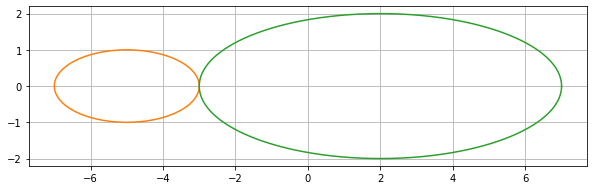

In [11]:
# It needs to be noted that this procedure is numerical in nature, e.g.:
ellipses = [(-5, 0, 2, 1, 0), (2, 0, 5, 2, 0)]
a, b = ellipse_polyline(ellipses)
print('number of intersections: ', num_intersections(a, b))

x, y = intersections(a, b)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, "o")
ax.plot(a[:,0], a[:,1])
ax.plot(b[:,0], b[:,1])
ax.set_aspect('equal')
ax.grid(':')

number of intersections:  3


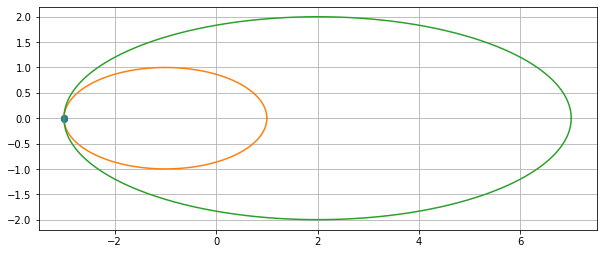

In [12]:
# or :
ellipses = [(-1, 0, 2, 1, 0), (2, 0, 5, 2, 0)]
a, b = ellipse_polyline(ellipses)
print('number of intersections: ', num_intersections(a, b))

x, y = intersections(a, b)

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x, y, "o")
ax.plot(a[:,0], a[:,1])
ax.plot(b[:,0], b[:,1])
ax.set_aspect('equal')
ax.grid(':')

In [13]:
# however, this should not be a problem for our usecase